# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


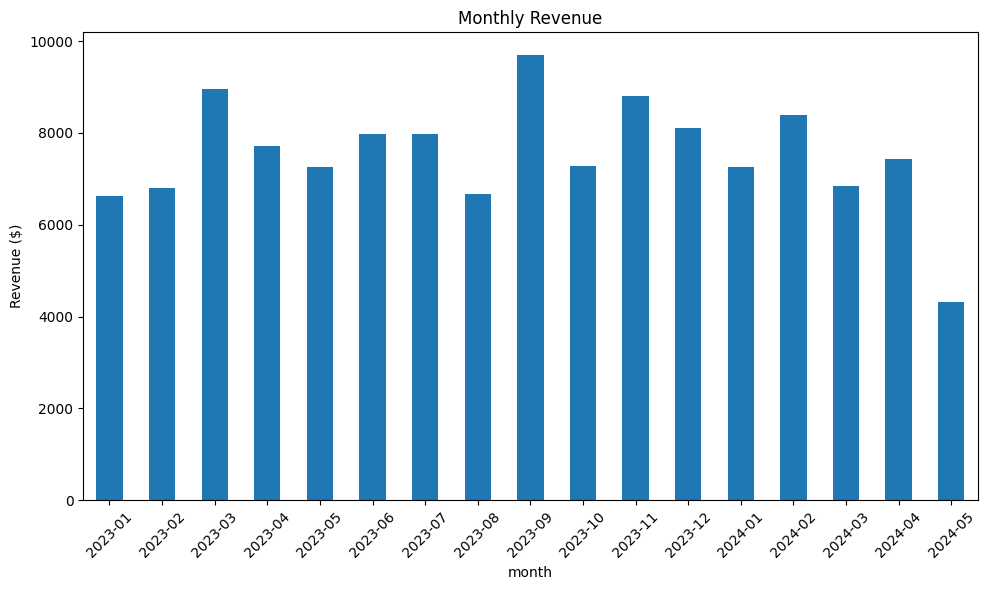

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Revenue Breakdown by month:
month
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
Freq: M, Name: revenue, dtype: float64
Total Revenue (Last Quarter): $ 23940.37


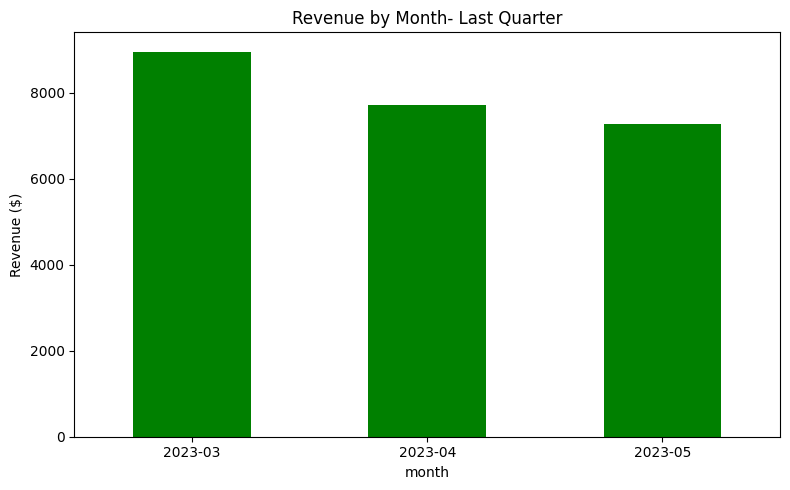

In [4]:
# Your code here
# Filter last quarter (Mar–May 2023)
last_quarter = monthly_revenue.loc["2023-03":"2023-05"]

print("Revenue Breakdown by month:")
print(last_quarter)

print("Total Revenue (Last Quarter): $",round(last_quarter.sum(), 2))
#viz
last_quarter.plot(kind="bar", figsize=(8,5), color="green", title="Revenue by Month- Last Quarter")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


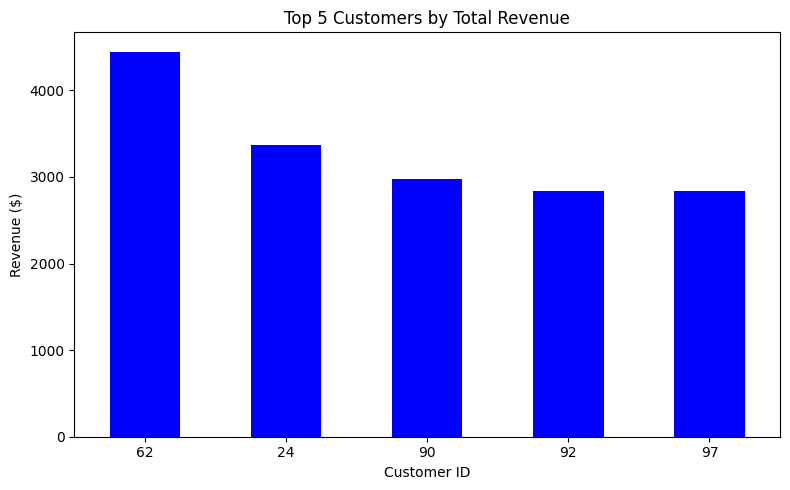

In [5]:
# Your code here
top_customers = (
    data.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Customers by Total Revenue:")
print(top_customers)

top_customers.plot(kind="bar", figsize=(8,5), color="blue", title="Top 5 Customers by Total Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Customer ID")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

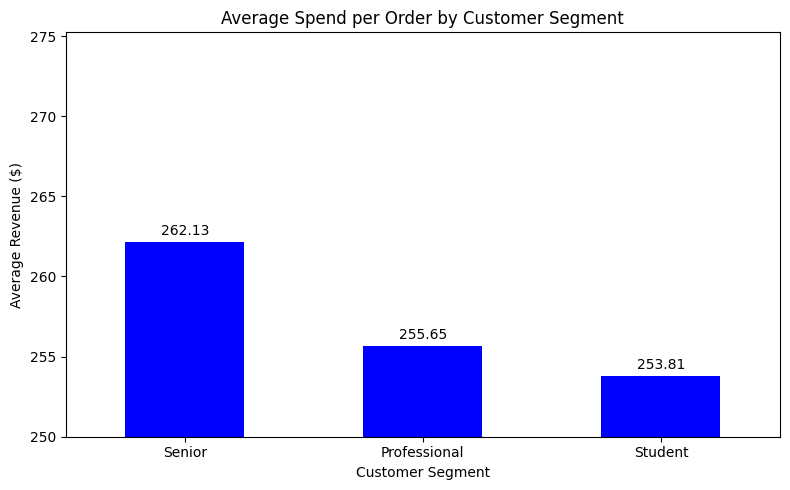

In [18]:
# Your code here
segment_avg_spend = (
    data.groupby("customer_segment")["revenue"]
    .mean()
    .sort_values(ascending=False).round(2)
)

ax = segment_avg_spend.plot(
    kind="bar",
    figsize=(8,5),
    color="blue",
    title="Average Spend per Order by Customer Segment"
)

plt.ylabel("Average Revenue ($)")
plt.xlabel("Customer Segment")
plt.ylim(250, None)
plt.xticks(rotation=0)
plt.tight_layout()

# 💬 Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [24]:
# Your code here
region_total_revenue = (
    data.groupby("region")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

print("Total Revenue by Region:")
print(region_total_revenue)

region_avg_order = (
    data.groupby("region")["revenue"]
    .mean()
    .sort_values(ascending=False).astype(int)
)

print("\nAverage Order Size by Region:")
print(region_avg_order)

highest_revenue_region = region_total_revenue.idxmax()
highest_avg_order_region = region_avg_order.idxmax()

print(f"\nRegion with Highest Total Revenue: {highest_revenue_region}")
print(f"Region with Highest Average Order Size: {highest_avg_order_region}")



Total Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
South    274
North    258
West     252
East     240
Name: revenue, dtype: int64

Region with Highest Total Revenue: South
Region with Highest Average Order Size: South


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Total Quantity Sold by Product Category:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Total Revenue by Product Category:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64

🏆 Most Popular Category (by Quantity): Home
💰 Highest Revenue Category: Home


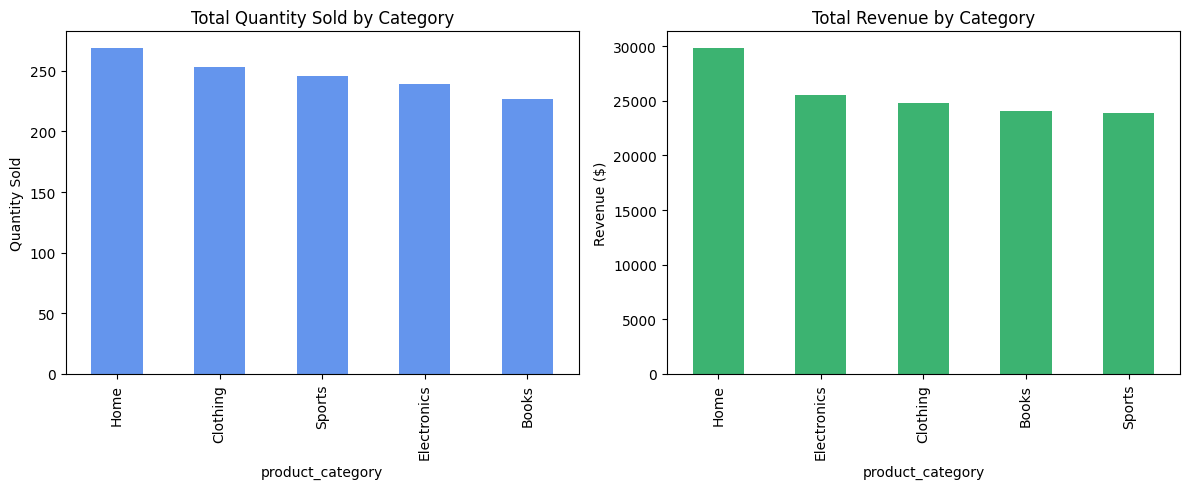

In [25]:
# Your code here
category_quantity = (
    data.groupby("product_category")["quantity"]
    .sum()
    .sort_values(ascending=False)
)

print("Total Quantity Sold by Product Category:")
print(category_quantity)
category_revenue = (
    data.groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTotal Revenue by Product Category:")
print(category_revenue)
most_popular = category_quantity.idxmax()
most_profitable = category_revenue.idxmax()

print(f"\n🏆 Most Popular Category (by Quantity): {most_popular}")
print(f"💰 Highest Revenue Category: {most_profitable}")

fig, ax = plt.subplots(1, 2, figsize=(12,5))

category_quantity.plot(kind="bar", ax=ax[0], color="cornflowerblue", title="Total Quantity Sold by Category")
ax[0].set_ylabel("Quantity Sold")

category_revenue.plot(kind="bar", ax=ax[1], color="mediumseagreen", title="Total Revenue by Category")
ax[1].set_ylabel("Revenue ($)")

plt.tight_layout()
plt.show()



### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average Revenue per Order:
discount_flag
Discounted     263.831362
No Discount    248.296337
Name: revenue, dtype: float64


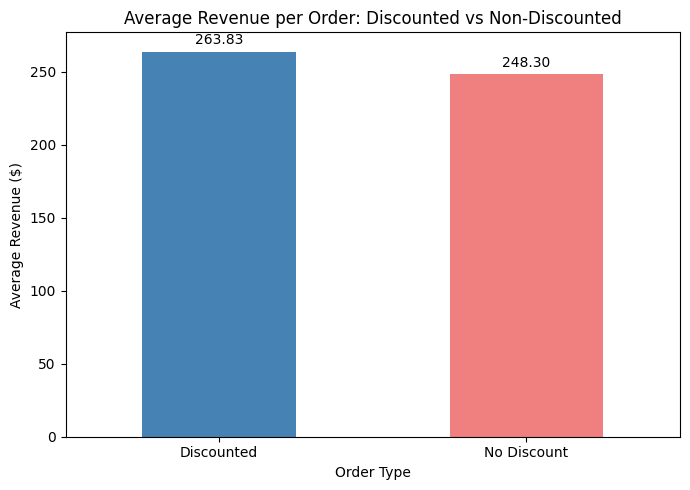

In [26]:
# Your code here
data["discount_flag"] = np.where(data["discount_applied"] > 0, "Discounted", "No Discount")

discount_comparison = (
    data.groupby("discount_flag")["revenue"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Revenue per Order:")
print(discount_comparison)

ax = discount_comparison.plot(
    kind="bar",
    color=["steelblue", "lightcoral"],
    figsize=(7,5),
    title="Average Revenue per Order: Discounted vs Non-Discounted"
)
plt.ylabel("Average Revenue ($)")
plt.xlabel("Order Type")
plt.xticks(rotation=0)
plt.ylim(0, None)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Percentage of Orders by Payment Method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue per Order by Payment Method:
payment_method
Debit Card     275.98
Credit Card    257.44
Gift Card      254.36
PayPal         236.07
Name: revenue, dtype: float64


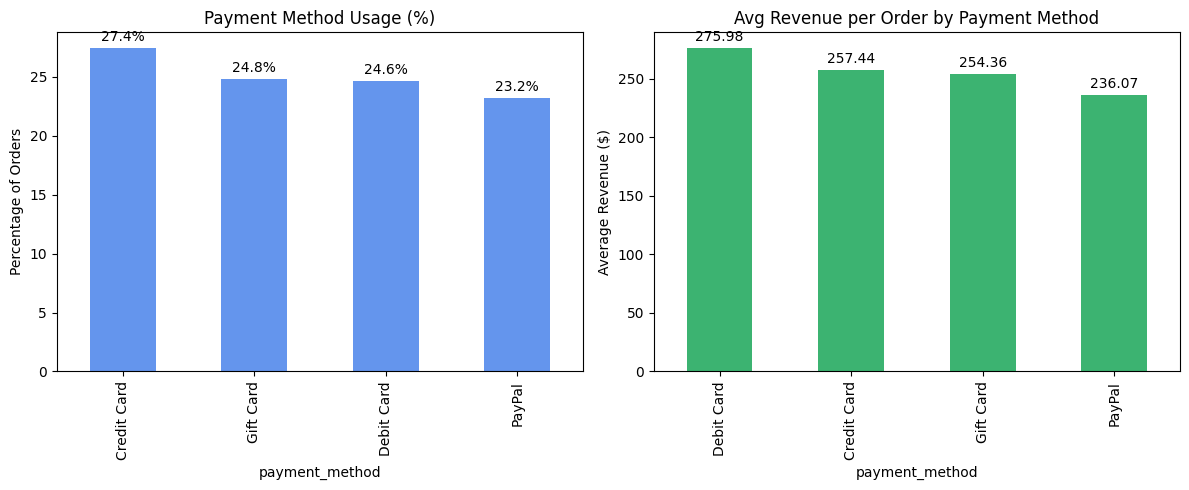

In [28]:
# Your code here
payment_percent = (
    data["payment_method"]
    .value_counts(normalize=True) * 100
).round(2)

print("Percentage of Orders by Payment Method:")
print(payment_percent)

payment_avg_revenue = (
    data.groupby("payment_method")["revenue"]
    .mean()
    .sort_values(ascending=False).round(2)
)

print("\nAverage Revenue per Order by Payment Method:")
print(payment_avg_revenue)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

payment_percent.plot(kind="bar", ax=ax[0], color="cornflowerblue", title="Payment Method Usage (%)")
ax[0].set_ylabel("Percentage of Orders")
ax[0].bar_label(ax[0].containers[0], fmt='%.1f%%', padding=3)

payment_avg_revenue.plot(kind="bar", ax=ax[1], color="mediumseagreen", title="Avg Revenue per Order by Payment Method")
ax[1].set_ylabel("Average Revenue ($)")
ax[1].bar_label(ax[1].containers[0], fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Total Revenue by Day of Week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


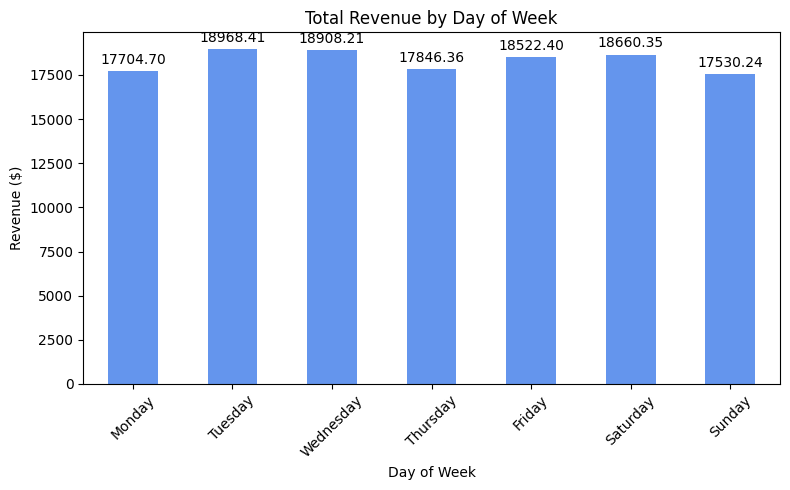

Average Revenue per Order:
day_type
Weekday    257.563249
Weekend    253.081049
Name: revenue, dtype: float64


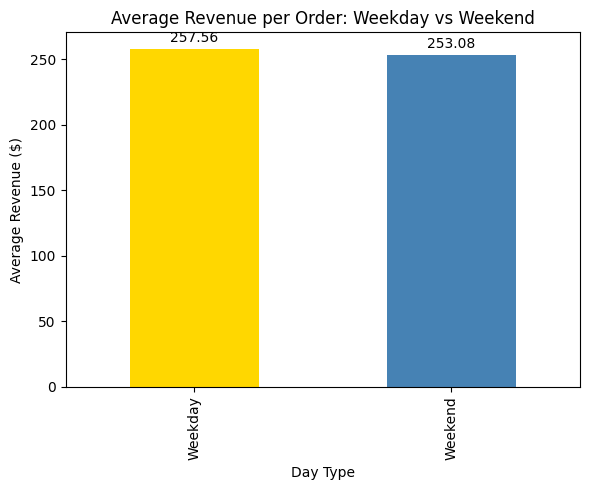

In [30]:
# Your code here
revenue_by_day = (
    data.groupby("day_of_week")["revenue"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

print("Total Revenue by Day of Week:")
print(revenue_by_day)
ax = revenue_by_day.plot(
    kind="bar",
    figsize=(8,5),
    color="cornflowerblue",
    title="Total Revenue by Day of Week"
)
plt.ylabel("Revenue ($)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()
data["day_type"] = np.where(data["day_of_week"].isin(["Saturday", "Sunday"]),
                            "Weekend", "Weekday")
avg_revenue_daytype = (
    data.groupby("day_type")["revenue"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Revenue per Order:")
print(avg_revenue_daytype)
ax = avg_revenue_daytype.plot(
    kind="bar",
    color=["gold", "steelblue"],
    figsize=(6,5),
    title="Average Revenue per Order: Weekday vs Weekend"
)
plt.ylabel("Average Revenue ($)")
plt.xlabel("Day Type")
plt.ylim(0, None)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()



### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

💰 Estimated Total Profit: $25,628.13

Profit by Region:
region
South    6967.89
North    6870.34
East     6244.36
West     5545.55
Name: profit, dtype: float64

🏆 Most Profitable Region: South


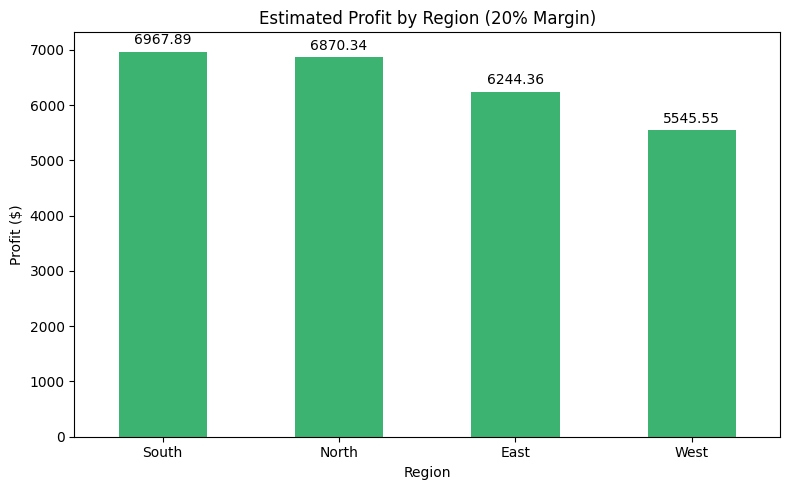

In [33]:
# Your code here
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum()
print(f"💰 Estimated Total Profit: ${total_profit:,.2f}")
profit_by_region = (
    data.groupby("region")["profit"]
    .sum()
    .sort_values(ascending=False).round(2)
)

print("\nProfit by Region:")
print(profit_by_region)

most_profitable_region = profit_by_region.idxmax()
print(f"\n🏆 Most Profitable Region: {most_profitable_region}")
ax = profit_by_region.plot(
    kind="bar",
    figsize=(8,5),
    color="mediumseagreen",
    title="Estimated Profit by Region (20% Margin)"
)
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

Since discounts drive higher spending, the company could run targeted discount campaigns in the West region where sales are lowest to attract more customers and increase revenue. These discounts could also be applied to low-performing categories like Books to encourage more purchases and move inventory faster.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.